In [1]:
import cv2
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten , Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [4]:
color_mode='rgb'

In [5]:
train_dir=r"D:\NullClass emotion detector\train"
test_dir=r"D:\NullClass emotion detector\test"
train_gen=ImageDataGenerator(rescale=1./255)
test_gen=ImageDataGenerator(rescale=1./255)
batch_size=32
train_generator=train_gen.flow_from_directory(
            train_dir,
            target_size=(48,48),
            batch_size=64,
            color_mode='grayscale',
            class_mode='categorical')
test_generator=test_gen.flow_from_directory(
            test_dir,
            target_size=(48,48),
            batch_size=64,
            color_mode='grayscale',
            class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
model= Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(48,48,1)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [8]:
#Use MobileNetV2()

In [9]:
learning_rate_schedule=tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=10000,
    decay_rate=0.9
)

optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule)

model.compile(loss=['categorical_crossentropy'],optimizer=optimizer,metrics=['accuracy'])


In [10]:
model.save_weights('model1.h5')

In [11]:
epochs = 25
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = test_generator.n//test_generator.batch_size

checkpoint = ModelCheckpoint("model1.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
callbacks = [checkpoint]

In [12]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [13]:
hist=model.fit(train_generator,
              steps_per_epoch=steps_per_epoch,
              epochs=epochs,
               validation_data=test_generator,
               validation_steps=validation_steps,
               callbacks=callbacks
                
              )

Epoch 1/25
448/448 [==============================] - ETA: 0s - loss: 1.8028 - accuracy: 0.2574
Epoch 1: saving model to model1.h5
448/448 [==============================] - 101s 220ms/step - loss: 1.8028 - accuracy: 0.2574 - val_loss: 1.7209 - val_accuracy: 0.3273
Epoch 2/25
448/448 [==============================] - ETA: 0s - loss: 1.6404 - accuracy: 0.3580
Epoch 2: saving model to model1.h5
448/448 [==============================] - 86s 191ms/step - loss: 1.6404 - accuracy: 0.3580 - val_loss: 1.5627 - val_accuracy: 0.4083
Epoch 3/25
448/448 [==============================] - ETA: 0s - loss: 1.5350 - accuracy: 0.4080
Epoch 3: saving model to model1.h5
448/448 [==============================] - 115s 256ms/step - loss: 1.5350 - accuracy: 0.4080 - val_loss: 1.4698 - val_accuracy: 0.4395
Epoch 4/25
448/448 [==============================] - ETA: 0s - loss: 1.4593 - accuracy: 0.4438
Epoch 4: saving model to model1.h5
448/448 [==============================] - 450s 1s/step - loss: 1.4593 -

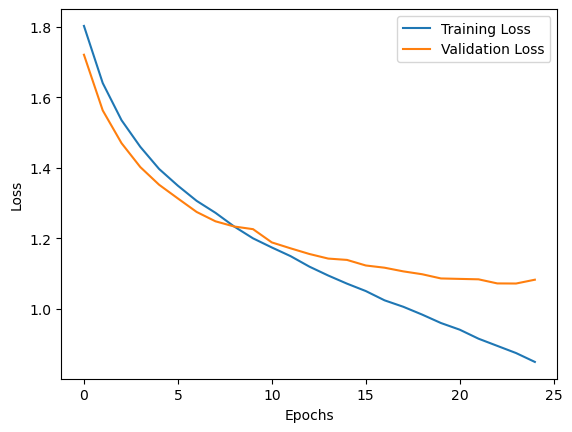

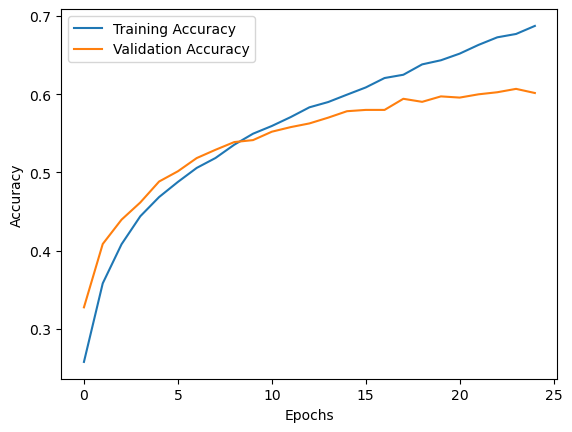

In [14]:

# Plot training and validation loss
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

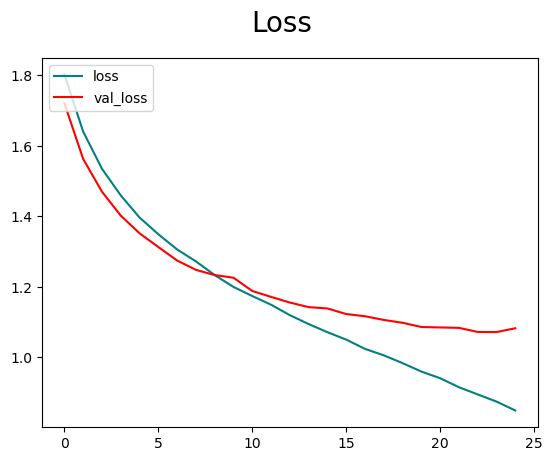

In [15]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='red',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

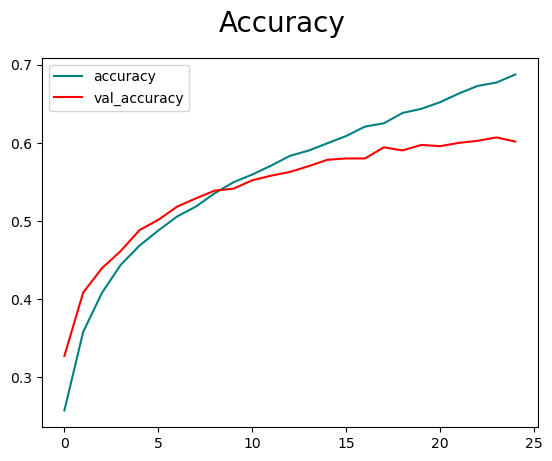

In [16]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='red',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [17]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','emotion.h5'))

In [20]:
model=load_model(r"C:\Users\PRATHAMESH MANDIYE\NullClass Technologies\models\emotion.h5")

In [21]:
model.load_weights('model1.h5')

    # prevents openCL usage and unnecessary logging messages
cv2.ocl.setUseOpenCL(False)

    # dictionary which assigns each label an emotion (alphabetical order)
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

    # start the webcam feed
cap = cv2.VideoCapture(0)
while True:
        # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    if not ret:
        break
    facecasc = cv2.CascadeClassifier(r"C:\Users\PRATHAMESH MANDIYE\NullClass Technologies\haarcascade_frontalface_default.xml")
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        prediction = model.predict(cropped_img)
        maxindex = int(np.argmax(prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.imshow('Video', cv2.resize(frame,(1600,960),interpolation = cv2.INTER_CUBIC))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step
